In [22]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib

model = load_model("pressure_ID_Fan_inlet_DL(1).h5")

dpAccBagh_us = '18.51997'

x = np.array([dpAccBagh_us, '60.93208', '946.2000', '226.4158', '945.4032']).astype(float)


# x = np.array(['18.51997', '60.93208', '946.2000', '226.4158', '945.4032']).astype(float)

y = -400.0651

scaler = joblib.load("scaler(1).pkl")

x_scaled = scaler.transform(x.reshape(1, -1))

pred = model.predict(x_scaled)

print("Predicted value:", pred)


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted value: [[-405.6013]]


In [2]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

model = load_model("pressure_at_bag_house_DL(2).h5")

In [3]:
df = pd.read_csv('Batch-1.1.csv')

In [4]:
df = df.iloc[:,14:24]
df.drop(columns=['Unnamed: 19','Unnamed: 20'],inplace=True)
df.head()

,Pressure at BagHouse Inlet,DP Across baghouse - UpperSide,DP Across baghouse - LowerSide,Pressure ID Fan Inlet,Canopy Damper Position,ID Fan1 Speed,ID Fan1 Current,ID Fan2 Speed
0,-216.1675,14.93200,17.62587,-386.0677,66.30715,946.2,228.6638,945.4032
1,-219.9002,15.85503,18.51997,-400.0651,60.93208,946.2,226.4158,945.4032
2,-215.4080,16.05035,18.84115,-397.2801,60.93605,946.2,221.4280,945.4032
3,-210.4601,16.11979,18.69213,-391.2399,60.93605,946.2,221.3578,945.4032
4,-215.1259,15.93750,18.62558,-390.9505,60.93208,946.2,222.6222,945.4032


In [5]:
print(df.isna().sum())
df.dropna(inplace=True)

Pressure at BagHouse Inlet        0
DP Across baghouse - UpperSide    0
DP Across baghouse - LowerSide    0
Pressure ID Fan Inlet             0
Canopy Damper Position            0
ID Fan1 Speed                     0
ID Fan1 Current                   0
ID Fan2 Speed                     0
dtype: int64


In [6]:
x = df.drop('Pressure at BagHouse Inlet',axis = 1)
y = df['Pressure at BagHouse Inlet']

In [7]:
x = np.array(x)

In [8]:
x

array([[  14.932  ,   17.62587, -386.0677 , ...,  946.2    ,  228.6638 ,
         945.4032 ],
       [  15.85503,   18.51997, -400.0651 , ...,  946.2    ,  226.4158 ,
         945.4032 ],
       [  16.05035,   18.84115, -397.2801 , ...,  946.2    ,  221.428  ,
         945.4032 ],
       ...,
       [  14.2173 ,   17.33652, -389.0336 , ...,  946.2    ,  227.4695 ,
         945.4032 ],
       [  14.10011,   17.2555 , -385.6698 , ...,  946.2    ,  227.7505 ,
         945.4032 ],
       [  14.60214,   17.56655, -402.6693 , ...,  946.2    ,  226.8372 ,
         945.4032 ]])

In [9]:
sc = joblib.load("scaler(2).pkl")
x_scaled = sc.transform(x)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
pred = model.predict(x_scaled)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [11]:
r2_score(y,pred)

0.992711411133479

In [12]:
pred = pred.reshape(1,-1)

In [13]:
diff = pred - (np.array(y)).reshape(1,-1)
pd.DataFrame(diff)

,0,1,2,3,4,5,6,7,8,9,...,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079
0,-1.214931,-3.802635,-2.567571,-2.927199,0.610092,-4.537542,-4.900082,-1.321524,-3.5523,-3.419275,...,-2.243896,-0.551796,-2.715685,-2.831008,-5.325127,-3.136118,3.02868,0.364592,0.401856,4.176145


In [18]:
print(diff[diff>5].size)
print(diff[diff>5])


8
[10.18468665  5.40713723  5.82489436  6.15769456  5.07179958  5.99746477
  5.04739905  5.64224968]


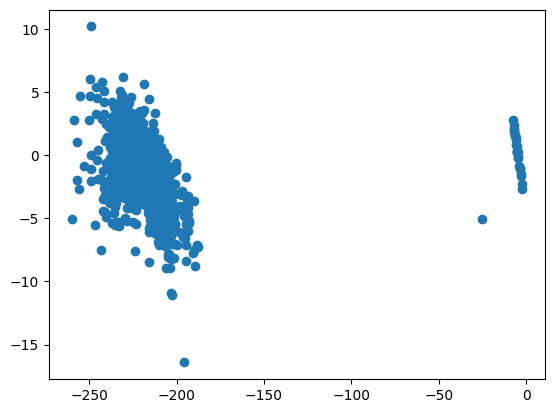

In [19]:
plt.scatter(y,diff)